In [35]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [36]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Sequential, Model as model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
from keras.optimizers import Adam,SGD,RMSprop



In [37]:
# To read image from disk, we use
# cv2.imread function, in below method,
img = cv2.imread("dataset/images/train/angry/27.jpg", cv2.IMREAD_COLOR)
 

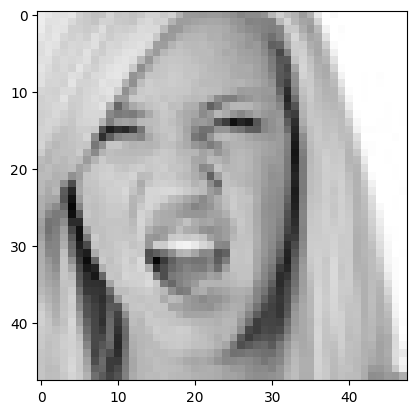

In [3]:
plt.imshow(img)
plt.show()

In [4]:
import sys
print(sys.executable)


c:\Users\HP\Desktop\emotion_detection\face_venv\Scripts\python.exe


In [5]:
import sys
sys.path.append('path/to/tensorflow')


In [6]:

from tensorflow.keras.utils import load_img

print(load_img)



<function load_img at 0x00000219023E6200>


In [7]:
picture_size = 48
folder_path = "dataset/images"

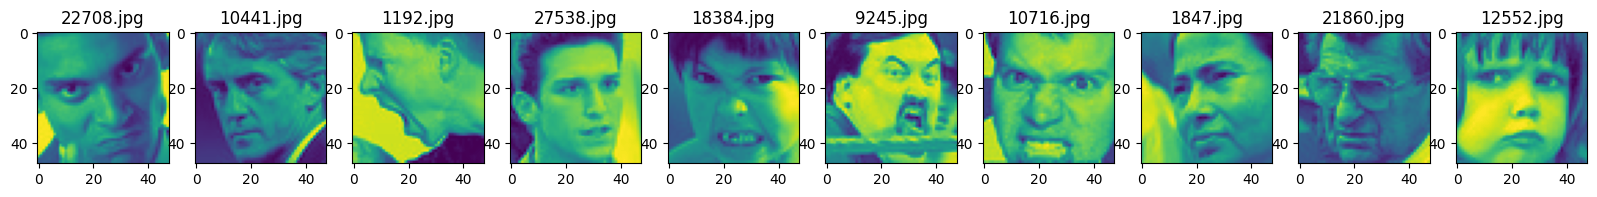

In [8]:
plt.figure(figsize=(20,20))
image_folder=r'C:\Users\HP\Desktop\emotion_detection\dataset\images\train\angry'
for i in range(10):
    file = random.choice(os.listdir(image_folder))
    image_path= os.path.join(image_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,10,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

Setting the Image dimension and source folder for loading the dataset



In [38]:
IMG_WIDTH=200
IMG_HEIGHT=200
image_folder=r'C:\Users\HP\Desktop\emotion_detection\dataset\images\train'


In [39]:
# Set the number of emotion categories
num_classes = 7

# Set the batch size and number of training epochs
batch_size =32
epochs = 5

In [40]:
from keras.preprocessing.image import ImageDataGenerator


In [41]:
# Create an ImageDataGenerator instance with desired transformations
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)


In [42]:
# Create generators for training and validation data
train_generator = datagen.flow_from_directory(
    'dataset/images/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode="grayscale",  # Change this to 'grayscale'
    subset='training'
)

Found 23060 images belonging to 7 classes.


In [43]:
validation_generator = datagen.flow_from_directory(
    'dataset/images/validation',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode="grayscale",  # Change this to 'grayscale'
    subset='validation'
)

Found 1411 images belonging to 7 classes.


In [44]:
# Define the CNN model architecture


model = Sequential([
    # First layer
    Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)),  
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    # Second layer
    Conv2D(128, (5, 5), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    # Third layer
    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    # Fourth layer
    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    # Dense layers...
    Dense(num_classes, activation='softmax')
])





In [45]:
# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [46]:
# Display model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 64)      640       
                                                                 
 batch_normalization_8 (Batc  (None, 198, 198, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 99, 99, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 95, 95, 128)       204928    
                                                                 
 batch_normalization_9 (Batc  (None, 95, 95, 128)     

In [47]:
# Train the model

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/5
720/720 [==============================] - 9760s 14s/step - loss: 2.5657 - accuracy: 0.2999 - val_loss: 2.0198 - val_accuracy: 0.2841
Epoch 2/5
720/720 [==============================] - 11572s 16s/step - loss: 2.1967 - accuracy: 0.3560 - val_loss: 1.7712 - val_accuracy: 0.3899
Epoch 3/5
514/720 [====================>.........] - ETA: 49:01 - loss: 2.0315 - accuracy: 0.4022

In [33]:
# Save the trained model
model.save("facial_emotion_model.h5")

In [34]:
# Retrieve the history of accuracy and loss from the model training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

NameError: name 'history' is not defined

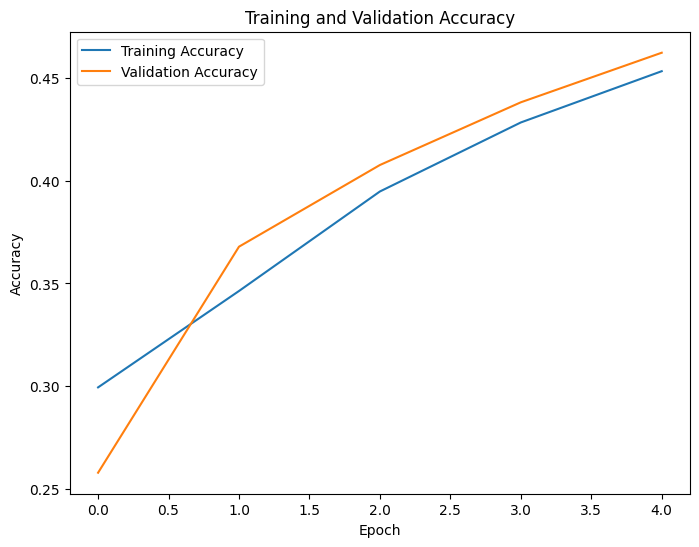

In [21]:
 #Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

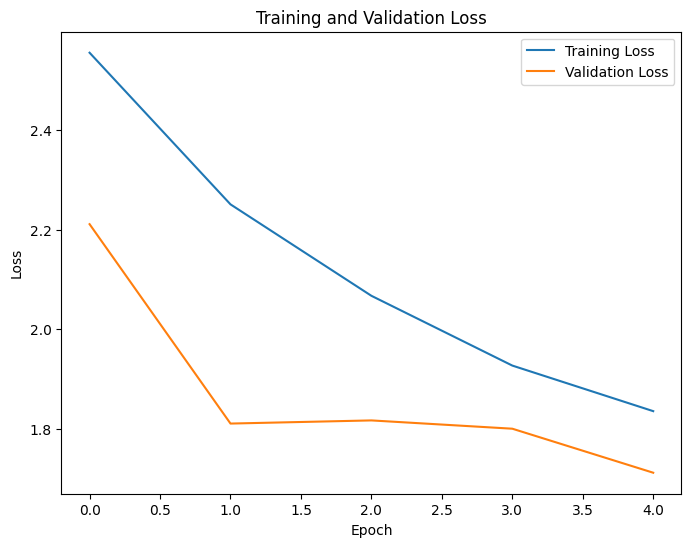

In [22]:
# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# Make predictions on test images
test_images_path = r'C:\Users\HP\Desktop\emotion_detection\dataset\images\test'
test_images = []

for filename in os.listdir(test_images_path):
    img = keras.preprocessing.image.load_img(os.path.join(test_images_path, filename), target_size=(IMG_WIDTH, IMG_WIDTH))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    test_images.append(img_array)

test_images = np.vstack(test_images)
test_images = test_images / 255.0

In [ ]:
# Load the trained model for predictions
loaded_model = keras.models.load_model("facial_emotion_model.h5")
predictions = loaded_model.predict(test_images)


In [ ]:
# Map predicted probabilities to emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotions = [emotion_labels[np.argmax(pred)] for pred in predictions]


In [30]:
# Display the predicted emotions
for i in range(len(test_images)):
    print(f"Image {i+1}: {predicted_emotions[i]}")

NameError: name 'predicted_emotions' is not defined